# Assets Algorithmic Trading Backtesting with Backtrader

## 1. Downloading the data:

In [14]:
import pandas as pd
import datetime
import yfinance as yf
import backtrader as bt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Date range
start = '2010-01-01'
end = '2020-12-31'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA','SPY']
assets.sort()

# Downloading data
prices = yf.download(assets, start=start, end=end)
display(prices.head())
prices = prices.dropna()

[*********************100%%**********************]  26 of 26 completed


Price       Adj Close                                                       \
Ticker            APA         BA        BAX        BMY     CMCSA       CNP   
Date                                                                         
2010-01-04 8297.9179% 4377.7542% 2384.6443% 1578.1890% 629.7532% 833.1621%   
2010-01-05 8395.8900% 4521.1338% 2368.2802% 1553.5586% 621.2180% 826.8506%   
2010-01-06 8527.5650% 4658.2790% 2376.4614% 1552.9423% 616.7649% 818.8173%   
2010-01-07 8398.2376% 4846.8559% 2414.9170% 1554.1750% 629.7532% 826.8506%   
2010-01-08 8354.3465% 4800.1022% 2420.6440% 1528.3125% 627.8980% 817.0958%   

Price                                                   ...   Volume           \
Ticker            CPB         DE        HPQ        JCI  ...     PCAR      PSA   
Date                                                    ...                     
2010-01-04 2175.9571% 4214.9296% 1613.6395% 1207.8203%  ...  3947550  1579100   
2010-01-05 2179.8115% 4199.1405% 1620.4077% 1201.8263%  ...  3448950  1131000   
2010-01-06 2155.3988% 4187.8620% 1605.3329% 1197.8301%  ...  5347500   832400   
2010-01-07 2122.6353% 4217.9371% 1605.9481% 1206.4883%  ...  3683550  1284100   
2010-01-08 2109.1429% 4332.9693% 1617.9464% 1210.4846%  ...  3606450  1281100   

Price                                                                  \
Ticker          SEE        SPY         T       TGT      TMO       TXT   
Date                                                                    
2010-01-04   920400  118944600  38576858   4589100  7182800   3630600   
2010-01-05   831400  111579900  46650478   4760100  3221900  12121100   
2010-01-06  1334400  116074400  50172450   7217400  3065000   5598300   
2010-01-07  1394900  131091100  44486797  12531000  2638300   5196100   
2010-01-08   702900  126402800  36586622   6512800  3162200   4104000   

Price                           
Ticker            VZ      ZION  
Date                            
2010-01-04  16176648   3974600  
2010-01-05  23722957   5605500  
2010-01-06  37506464  12615200  
2010-01-07  25508242  24716800  
2010-01-08  20658308   6903000  

[5 rows x 156 columns]

In [15]:
############################################################
# Showing data
############################################################

display(prices.head())

Price       Adj Close                                                       \
Ticker            APA         BA        BAX        BMY     CMCSA       CNP   
Date                                                                         
2010-01-04 8297.9179% 4377.7542% 2384.6443% 1578.1890% 629.7532% 833.1621%   
2010-01-05 8395.8900% 4521.1338% 2368.2802% 1553.5586% 621.2180% 826.8506%   
2010-01-06 8527.5650% 4658.2790% 2376.4614% 1552.9423% 616.7649% 818.8173%   
2010-01-07 8398.2376% 4846.8559% 2414.9170% 1554.1750% 629.7532% 826.8506%   
2010-01-08 8354.3465% 4800.1022% 2420.6440% 1528.3125% 627.8980% 817.0958%   

Price                                                   ...   Volume           \
Ticker            CPB         DE        HPQ        JCI  ...     PCAR      PSA   
Date                                                    ...                     
2010-01-04 2175.9571% 4214.9296% 1613.6395% 1207.8203%  ...  3947550  1579100   
2010-01-05 2179.8115% 4199.1405% 1620.4077% 1201.8263%  ...  3448950  1131000   
2010-01-06 2155.3988% 4187.8620% 1605.3329% 1197.8301%  ...  5347500   832400   
2010-01-07 2122.6353% 4217.9371% 1605.9481% 1206.4883%  ...  3683550  1284100   
2010-01-08 2109.1429% 4332.9693% 1617.9464% 1210.4846%  ...  3606450  1281100   

Price                                                                  \
Ticker          SEE        SPY         T       TGT      TMO       TXT   
Date                                                                    
2010-01-04   920400  118944600  38576858   4589100  7182800   3630600   
2010-01-05   831400  111579900  46650478   4760100  3221900  12121100   
2010-01-06  1334400  116074400  50172450   7217400  3065000   5598300   
2010-01-07  1394900  131091100  44486797  12531000  2638300   5196100   
2010-01-08   702900  126402800  36586622   6512800  3162200   4104000   

Price                           
Ticker            VZ      ZION  
Date                            
2010-01-04  16176648   3974600  
2010-01-05  23722957   5605500  
2010-01-06  37506464  12615200  
2010-01-07  25508242  24716800  
2010-01-08  20658308   6903000  

[5 rows x 156 columns]

## 2. Building the Backtest Function with Backtrader

### 2.1 Defining Backtest Function

In [16]:
############################################################
# Defining the backtest function 
############################################################

def backtest(datas, strategy, start, end, plot=False, **kwargs):
    cerebro = bt.Cerebro()

    # Here we add transaction costs and other broker costs
    cerebro.broker.setcash(1000000.0)
    cerebro.broker.setcommission(commission=0.005) # Commission 0.5%
    cerebro.broker.set_slippage_perc(0.005, # Slippage 0.5%
                                     slip_open=True,
                                     slip_limit=True,
                                     slip_match=True,
                                     slip_out=False)
    for data in datas:
        cerebro.adddata(data)

    # Here we add the indicators that we are going to store
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, riskfreerate=0.0)
    cerebro.addanalyzer(bt.analyzers.Returns)
    cerebro.addanalyzer(bt.analyzers.DrawDown)
    cerebro.addstrategy(strategy, **kwargs)
    cerebro.addobserver(bt.observers.Value)
    cerebro.addobserver(bt.observers.DrawDown)
    results = cerebro.run(stdstats=False)
    if plot:
        cerebro.plot(iplot=False, start=start, end=end)
    return (results[0].analyzers.drawdown.get_analysis()['max']['drawdown'],
            results[0].analyzers.returns.get_analysis()['rnorm100'],
            results[0].analyzers.sharperatio.get_analysis()['sharperatio'])

### 2.2 Building Data Feeds for Backtesting

In [17]:
############################################################
# Create objects that contain the prices of assets
############################################################

# Creating Assets bt.feeds
assets_prices = []
for i in assets:
    if i != 'SPY':
        prices_ = prices.drop(columns='Adj Close').loc[:, (slice(None), i)].dropna()
        prices_.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
        assets_prices.append(bt.feeds.PandasData(dataname=prices_, plot=False))

# Creating Benchmark bt.feeds        
prices_ = prices.drop(columns='Adj Close').loc[:, (slice(None), 'SPY')].dropna()
prices_.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
benchmark = bt.feeds.PandasData(dataname=prices_, plot=False)

display(prices_.head())

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,11333.0002%,11338.9999%,11151.0002%,11237.0003%,118944600
2010-01-05,11362.9997%,11368.0000%,11284.9998%,11326.0002%,111579900
2010-01-06,11370.9999%,11398.9998%,11343.0000%,11351.9997%,116074400
2010-01-07,11419.0002%,11433.0002%,11318.0000%,11350.0000%,131091100
2010-01-08,11457.0000%,11462.0003%,11366.0004%,11388.9999%,126402800


## 3. Building Strategies with Backtrader

### 3.1 Buy and Hold SPY

In [18]:
############################################################
# Building the Buy and Hold strategy
############################################################

class BuyAndHold(bt.Strategy):

    def __init__(self):
        self.counter = 0

    def next(self):
        if self.counter >= 1004:
            if self.getposition(self.data).size == 0:
                self.order_target_percent(self.data, target=0.99)
        self.counter += 1 

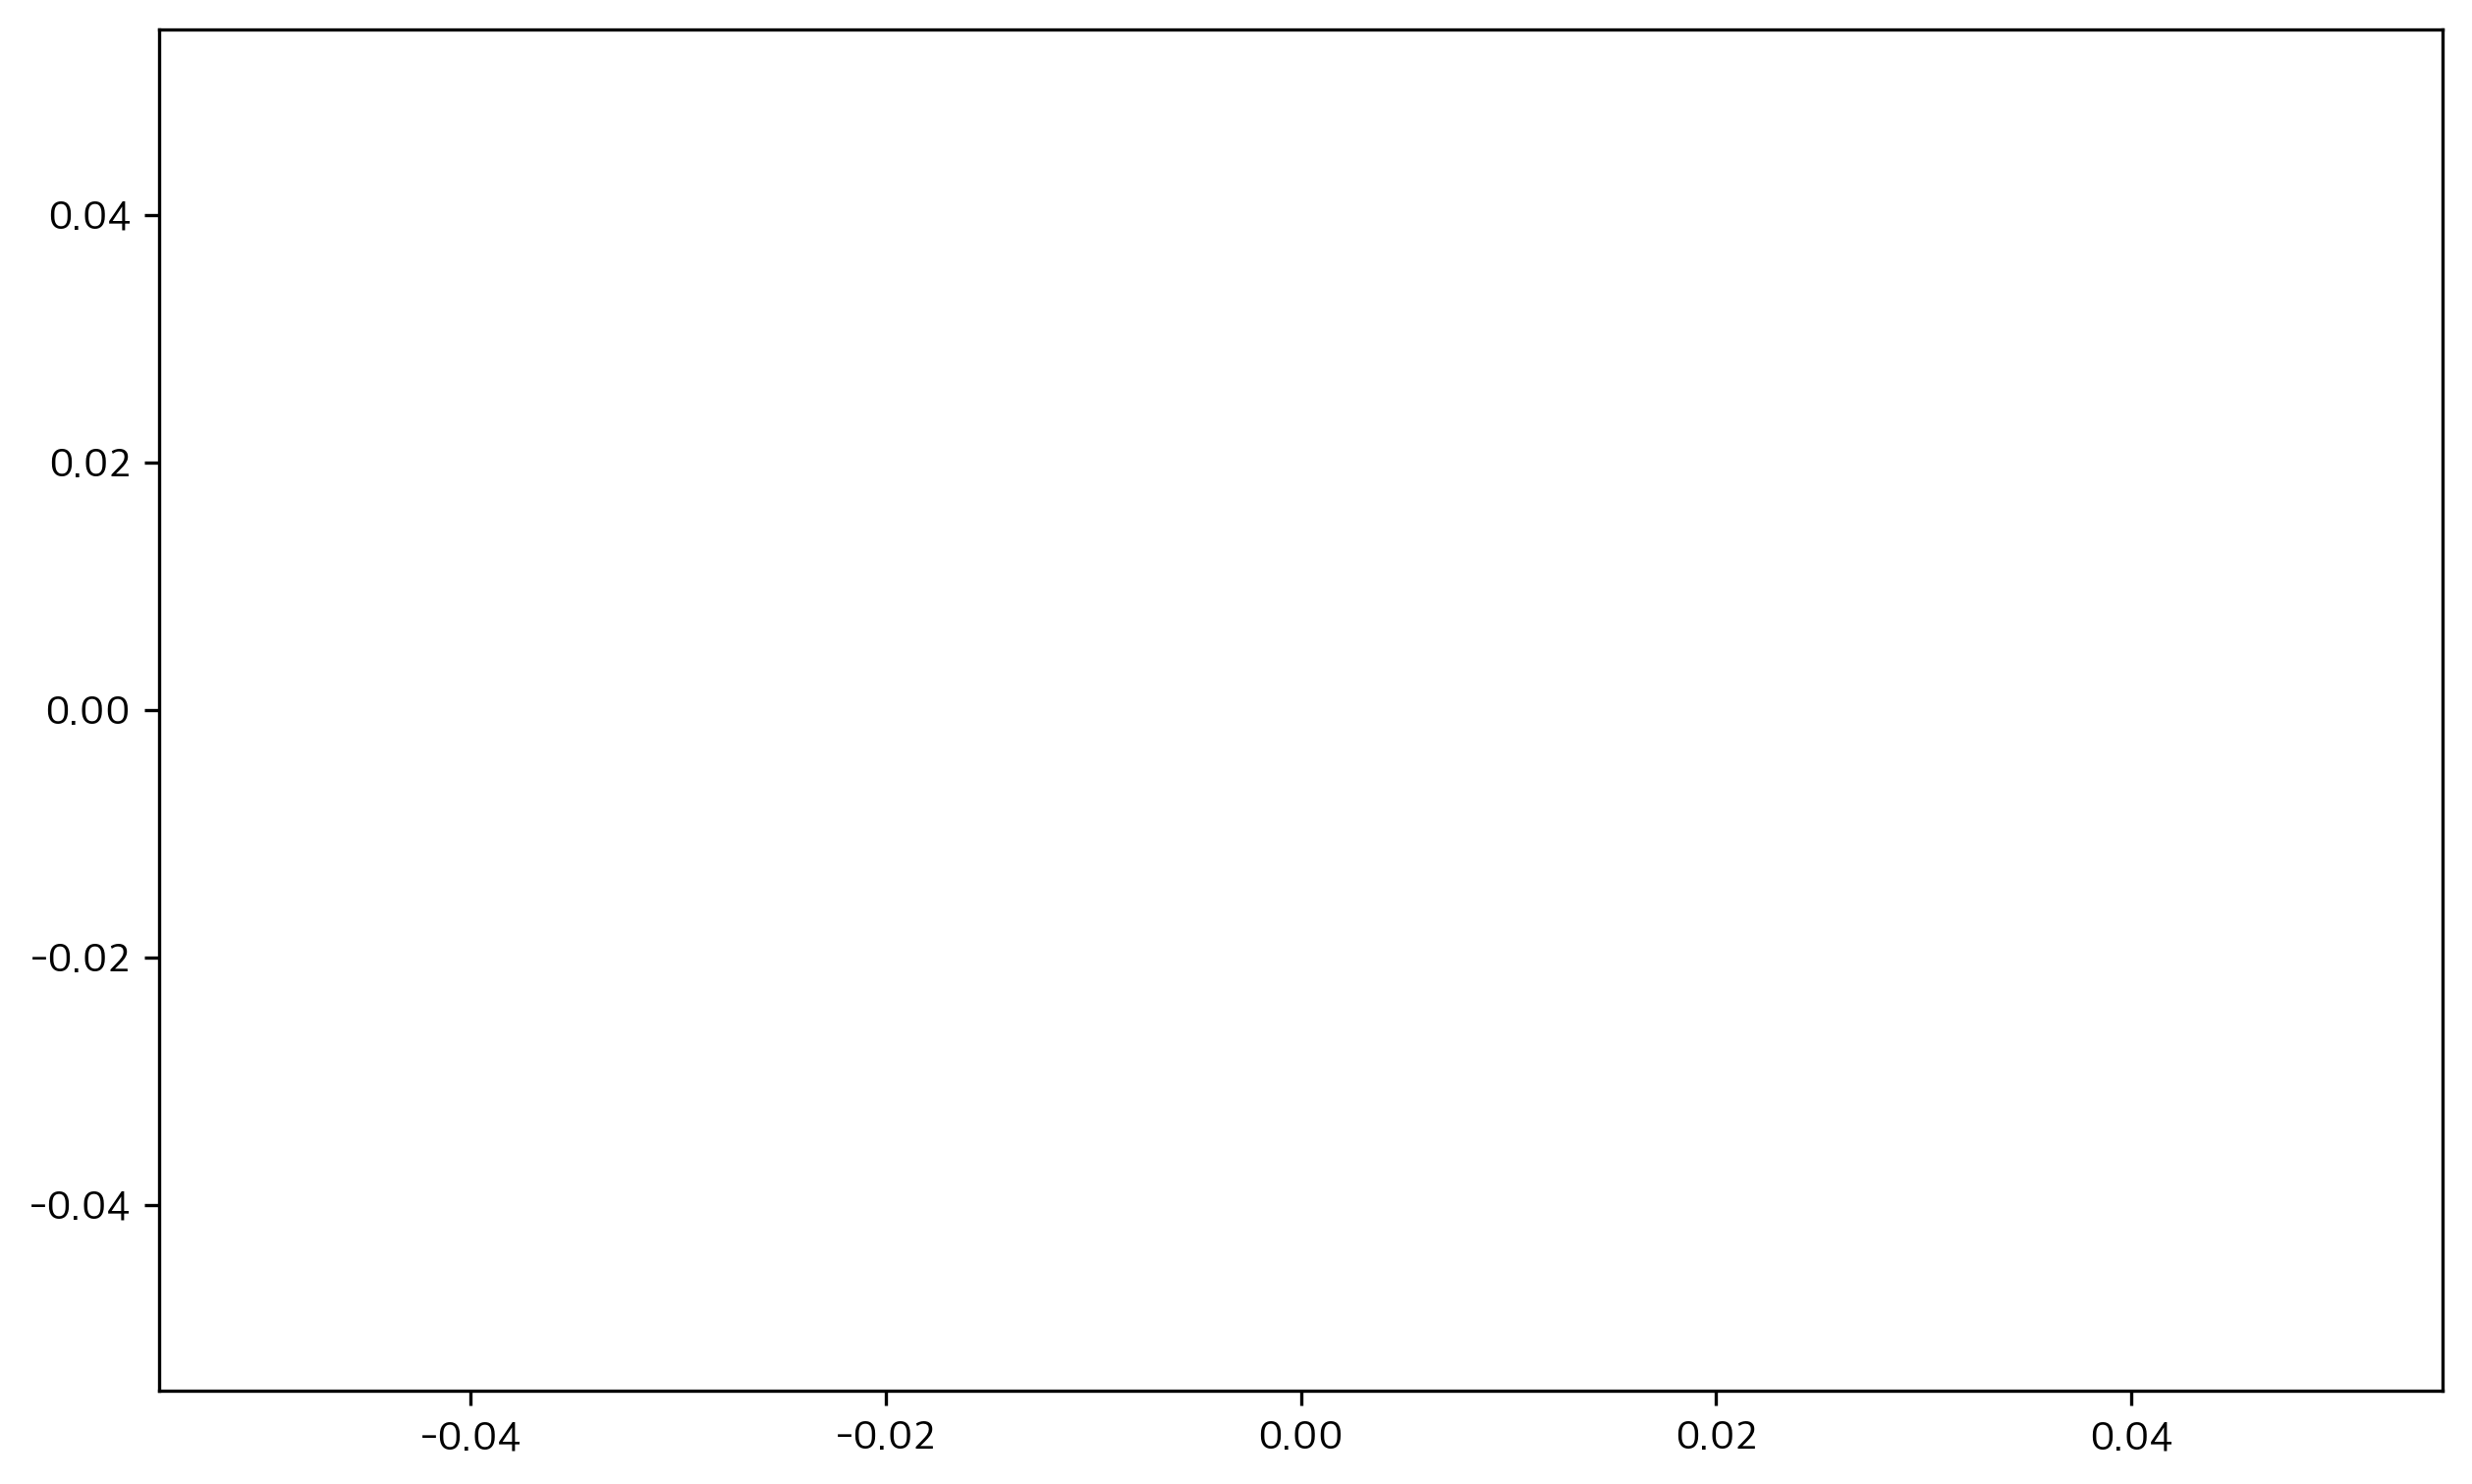

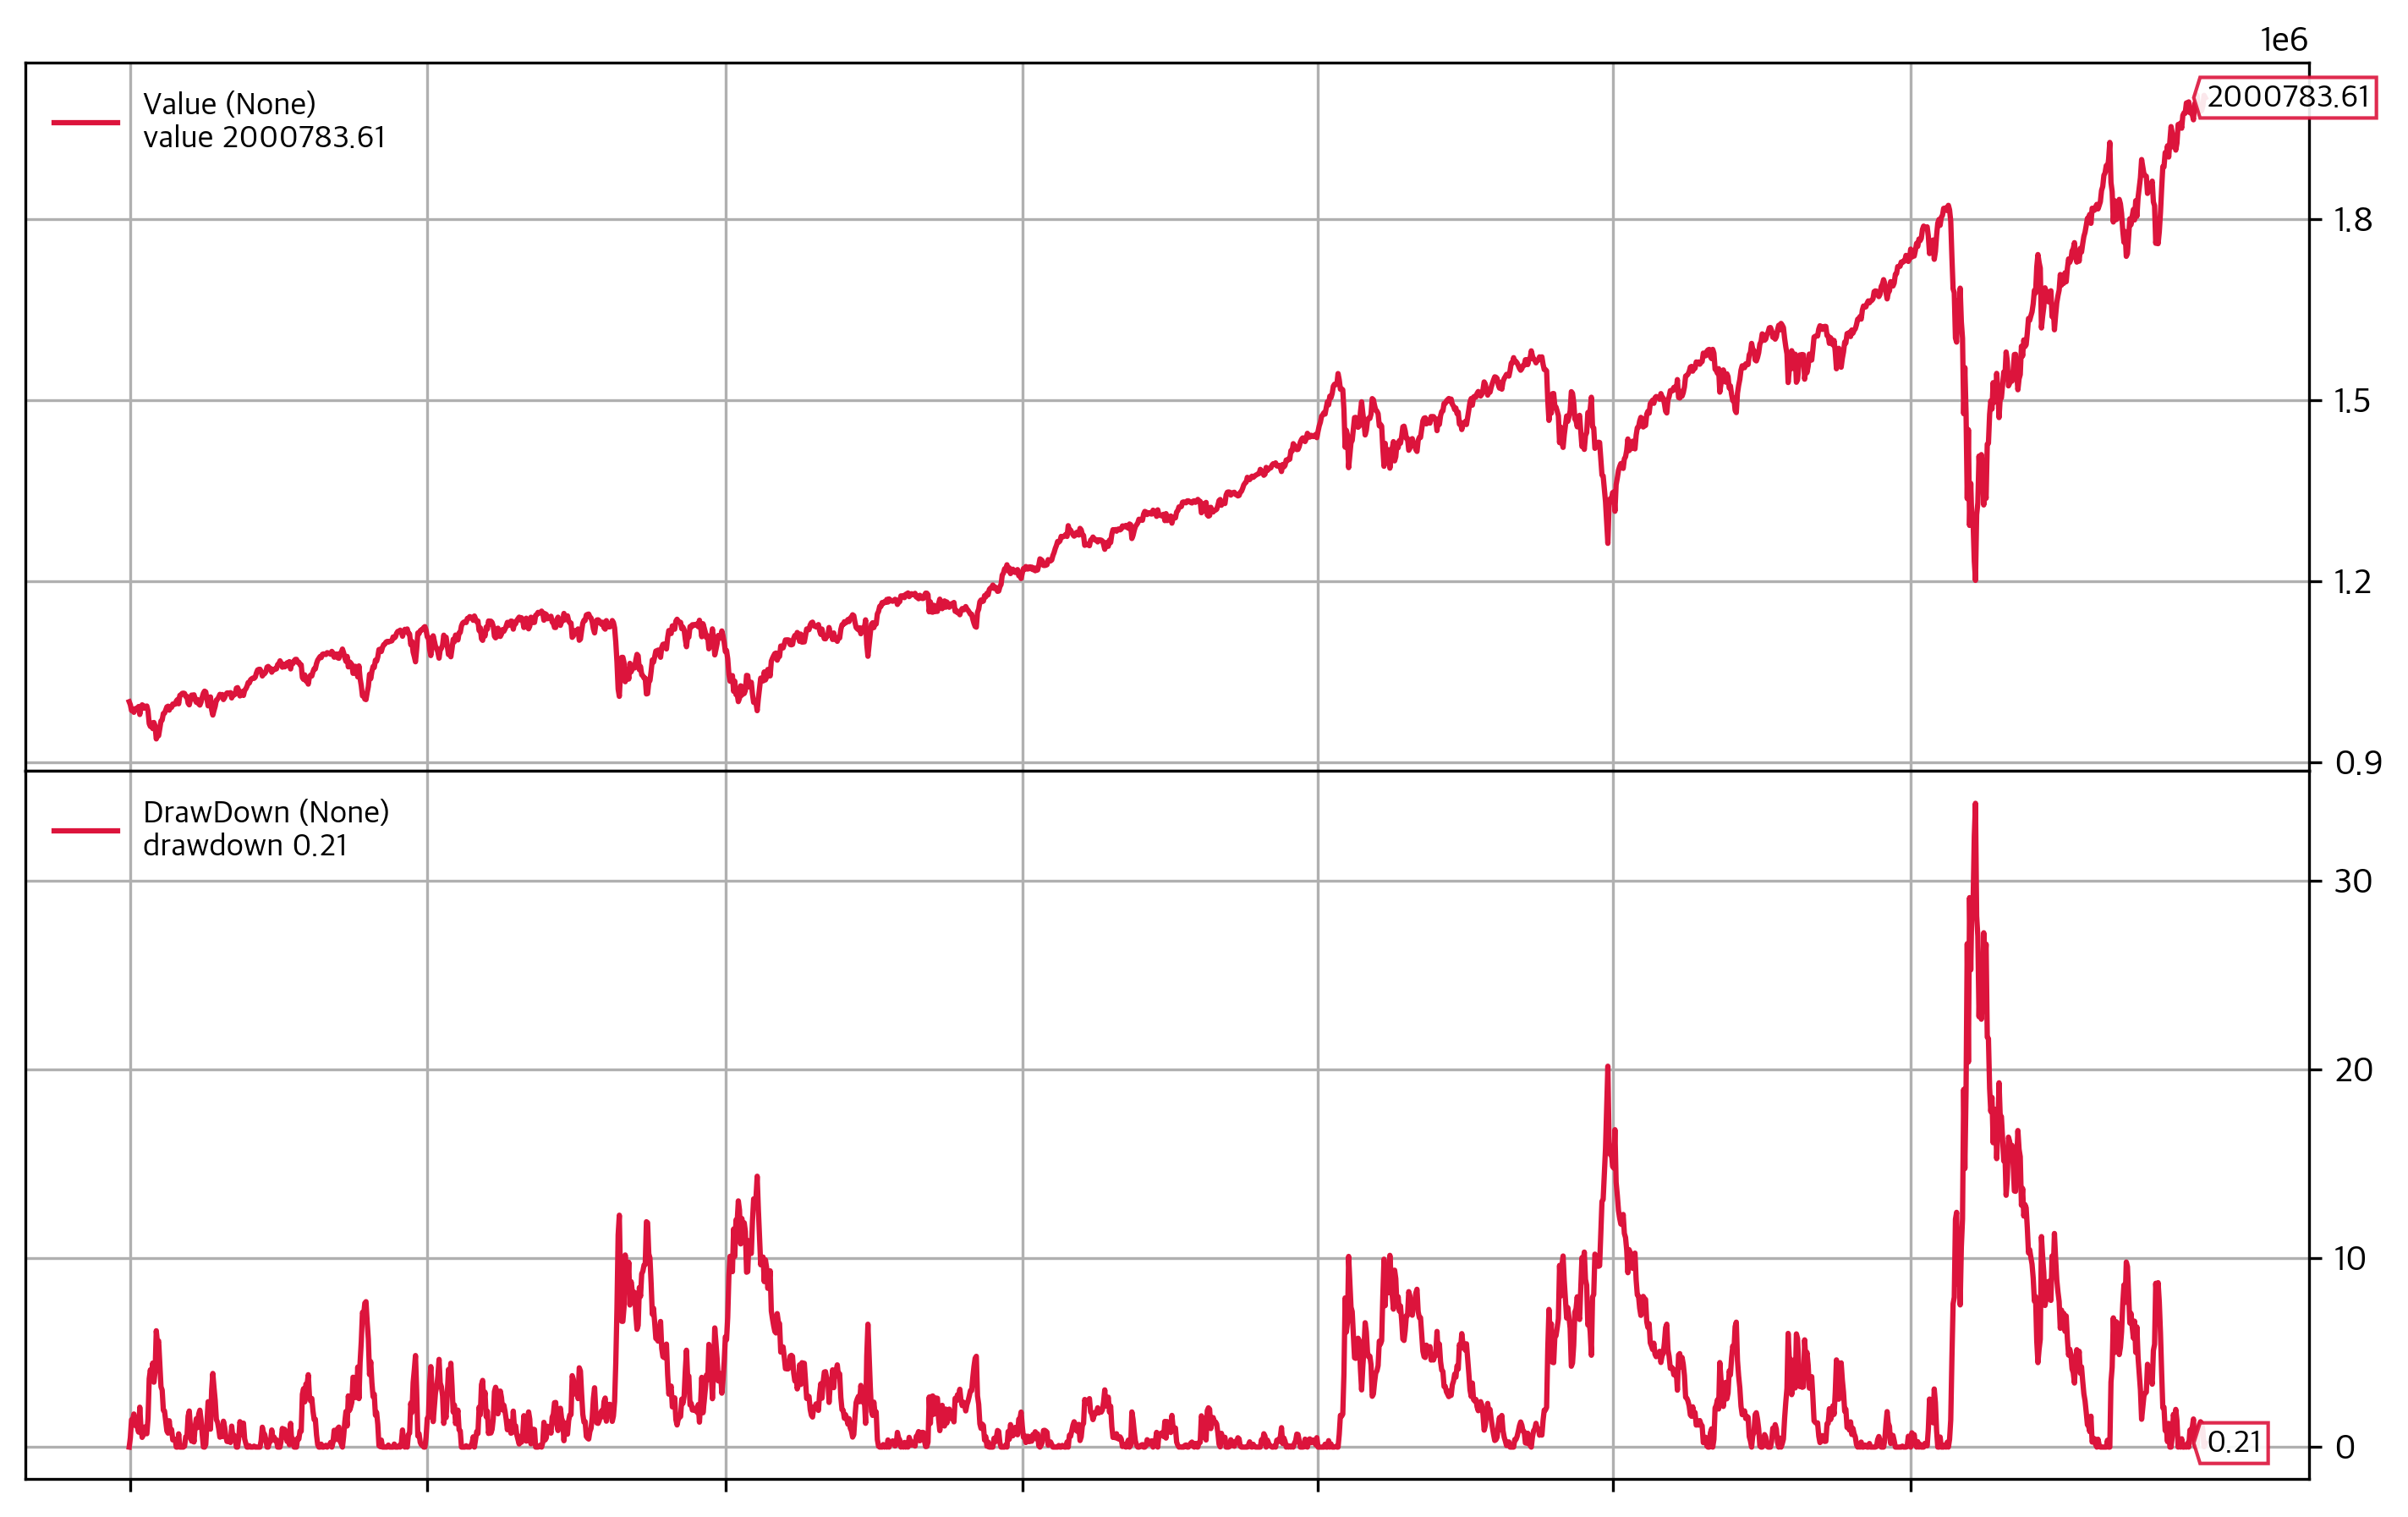

In [19]:
############################################################
# Run the backtest for the selected period
############################################################
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6) # (w, h)
plt.plot() # We need to do this to avoid errors in inline plot

start = 1004
end = prices.shape[0] - 1

dd, cagr, sharpe = backtest([benchmark],
                            BuyAndHold,
                            start=start,
                            end=end,
                            plot=True)

In [20]:
############################################################
# Show Buy and Hold Strategy Stats 
############################################################

print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

Max Drawdown: 34.10%
CAGR: 6.53%
Sharpe: 0.679


### 3.2 Rebalancing Quarterly using Riskfolio-Lib

In [21]:
############################################################
# Calculate assets returns
############################################################

pd.options.display.float_format = '{:.4%}'.format

data = prices.loc[:, ('Adj Close', slice(None))]
data.columns = assets
data = data.drop(columns=['SPY']).dropna()
returns = data.pct_change().dropna()
display(returns.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,1.1807%,3.2752%,-0.6862%,-1.5607%,-1.3553%,-0.7575%,0.1771%,-0.3746%,0.4194%,-0.4963%,...,-0.2579%,1.8027%,0.8236%,-1.0445%,-0.4898%,0.3708%,0.3368%,-1.8908%,0.1803%,3.5259%
2010-01-06,1.5683%,3.0334%,0.3454%,-0.0397%,-0.7168%,-0.9716%,-1.1199%,-0.2686%,-0.9303%,-0.3325%,...,-1.1635%,1.3148%,-0.6065%,-1.9274%,-0.9824%,1.9085%,0.9442%,3.4796%,-2.8754%,8.6957%
2010-01-07,-1.5166%,4.0482%,1.6182%,0.0794%,2.1059%,0.9811%,-1.5201%,0.7181%,0.0383%,0.7228%,...,-1.2426%,1.3241%,-0.1370%,1.0295%,-1.1228%,1.2284%,0.0000%,4.4491%,-0.5952%,11.2000%
2010-01-08,-0.5226%,-0.9646%,0.2372%,-1.6641%,-0.2946%,-1.1798%,-0.6356%,2.7272%,0.7471%,0.3312%,...,-0.5298%,0.1307%,-1.8207%,0.4169%,-0.7326%,-0.3979%,1.6836%,0.9411%,0.0630%,-1.6187%
2010-01-11,0.3002%,-1.1851%,-0.5746%,1.0475%,-0.6501%,0.7022%,0.3046%,4.0257%,-0.3042%,2.5860%,...,1.2649%,1.6444%,0.6859%,-0.0461%,-0.4797%,0.2197%,1.1857%,5.3484%,0.4095%,0.6094%


In [22]:
############################################################
# Selecting Dates for Rebalancing
############################################################

# Selecting last day of month of available data
index = returns.groupby([returns.index.year, returns.index.month]).tail(1).index
index_2 = returns.index

# Quarterly Dates
index = [x for x in index if float(x.month) % 3.0 == 0 ] 

# Dates where the strategy will be backtested
index_ = [index_2.get_loc(x) for x in index if index_2.get_loc(x) > 1000]

In [23]:
############################################################
# Building Constraints
############################################################

asset_classes = {'Assets': ['JCI','TGT','CMCSA','CPB','MO','APA','MMC','JPM',
                            'ZION','PSA','BAX','BMY','LUV','PCAR','TXT','TMO',
                            'DE','MSFT','HPQ','SEE','VZ','CNP','NI','T','BA'], 
                 'Industry': ['Consumer Discretionary','Consumer Discretionary',
                              'Consumer Discretionary', 'Consumer Staples',
                              'Consumer Staples','Energy','Financials',
                              'Financials','Financials','Financials',
                              'Health Care','Health Care','Industrials','Industrials',
                              'Industrials','Health care','Industrials',
                              'Information Technology','Information Technology',
                              'Materials','Telecommunications Services','Utilities',
                              'Utilities','Telecommunications Services','Financials']}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

constraints = {'Disabled': [False, False, False],
               'Type': ['All Assets', 'All Classes', 'All Classes'],
               'Set': ['', 'Industry', 'Industry'],
               'Position': ['', '', ''],
               'Sign': ['<=', '<=', '>='],
               'Weight': [0.10, 0.20, 0.03],
               'Type Relative': ['', '', ''],
               'Relative Set': ['', '', ''],
               'Relative': ['', '', ''],
               'Factor': ['', '', '']}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,All Assets,,,<=,10.0000%,,,,
1,False,All Classes,Industry,,<=,20.0000%,,,,
2,False,All Classes,Industry,,>=,3.0000%,,,,


In [24]:
############################################################
# Building constraint matrixes for Riskfolio Lib
############################################################

import riskfolio as rp

A, B = rp.assets_constraints(constraints, asset_classes)

In [28]:
%%time
############################################################
# Building a loop that estimate optimal portfolios on
# rebalancing dates
############################################################

models = {}

# rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM',
#        'CVaR', 'WR', 'MDD', 'ADD', 'CDaR']

rms = ['MV', 'CVaR', 'WR', 'CDaR']

for j in rms:
    
    weights = pd.DataFrame([])

    for i in index_:
        Y = returns.iloc[i-1000:i,:] # taking last 4 years (250 trading days per year)

        # Building the portfolio object
        port = rp.Portfolio(returns=Y)
        
        # Add portfolio constraints
        port.ainequality = A
        port.binequality = B
        
        # Calculating optimum portfolio

        # Select method and estimate input parameters:

        method_mu='hist' # Method to estimate expected returns based on historical data.
        method_cov='hist' # Method to estimate covariance matrix based on historical data.

        # port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)
        
        # Estimate optimal portfolio:
        
        # port.solvers = ['MOSEK']
        # port.alpha = 0.05
        # model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
        # rm = j # Risk measure used, this time will be variance
        # obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
        # hist = True # Use historical scenarios for risk measures that depend on scenarios
        # rf = 0 # Risk free rate
        # l = 0 # Risk aversion factor, only useful when obj is 'Utility'
        
        port.assets_stats(method_mu=method_mu, method_cov=method_cov)
        model='Classic' # 고전적인 방법(과거 데이터 기반)을 사용하여 최적화 모델을 설정합니다. 다른 옵션으로는 Black-Litterman 모델(BL)과 요인 모델(FM)이 있습니다.
        rm = 'MV' # 리스크 측정 방법으로 분산(Variance)을 사용
        obj = 'Sharpe' # 샤프 비율을 최대화하는 것을 목표로 최적화를 수행합니다. 다른 목표 함수로는 최소 리스크(MinRisk), 최대 수익(MaxRet), 효용(Utility)이 있습니다.
        hist = True # 역사적 시나리오를 사용하여 리스크 측정 값을 계산
        rf = 0 # 무위험 이자율을 0으로 설정
        l = 0 # 위험 회피 계수를 0으로 설정합니다. 이는 obj가 'Utility'일 때만 유용합니다.

        w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

        if w is None:
            w = weights.tail(1).T
        weights = pd.concat([weights, w.T], axis = 0)
    
    models[j] = weights.copy()
    models[j].index = index_

CPU times: user 1min 34s, sys: 11 s, total: 1min 45s
Wall time: 7.44 s


In [29]:
############################################################
# Building the Asset Allocation Class
############################################################

class AssetAllocation(bt.Strategy):

    def __init__(self):

        j = 0
        for i in assets:
            setattr(self, i, self.datas[j])
            j += 1
        
        self.counter = 0
        
    def next(self):
        if self.counter in weights.index.tolist():
            for i in assets:
                w = weights.loc[self.counter, i]
                self.order_target_percent(getattr(self, i), target=w)
        self.counter += 1

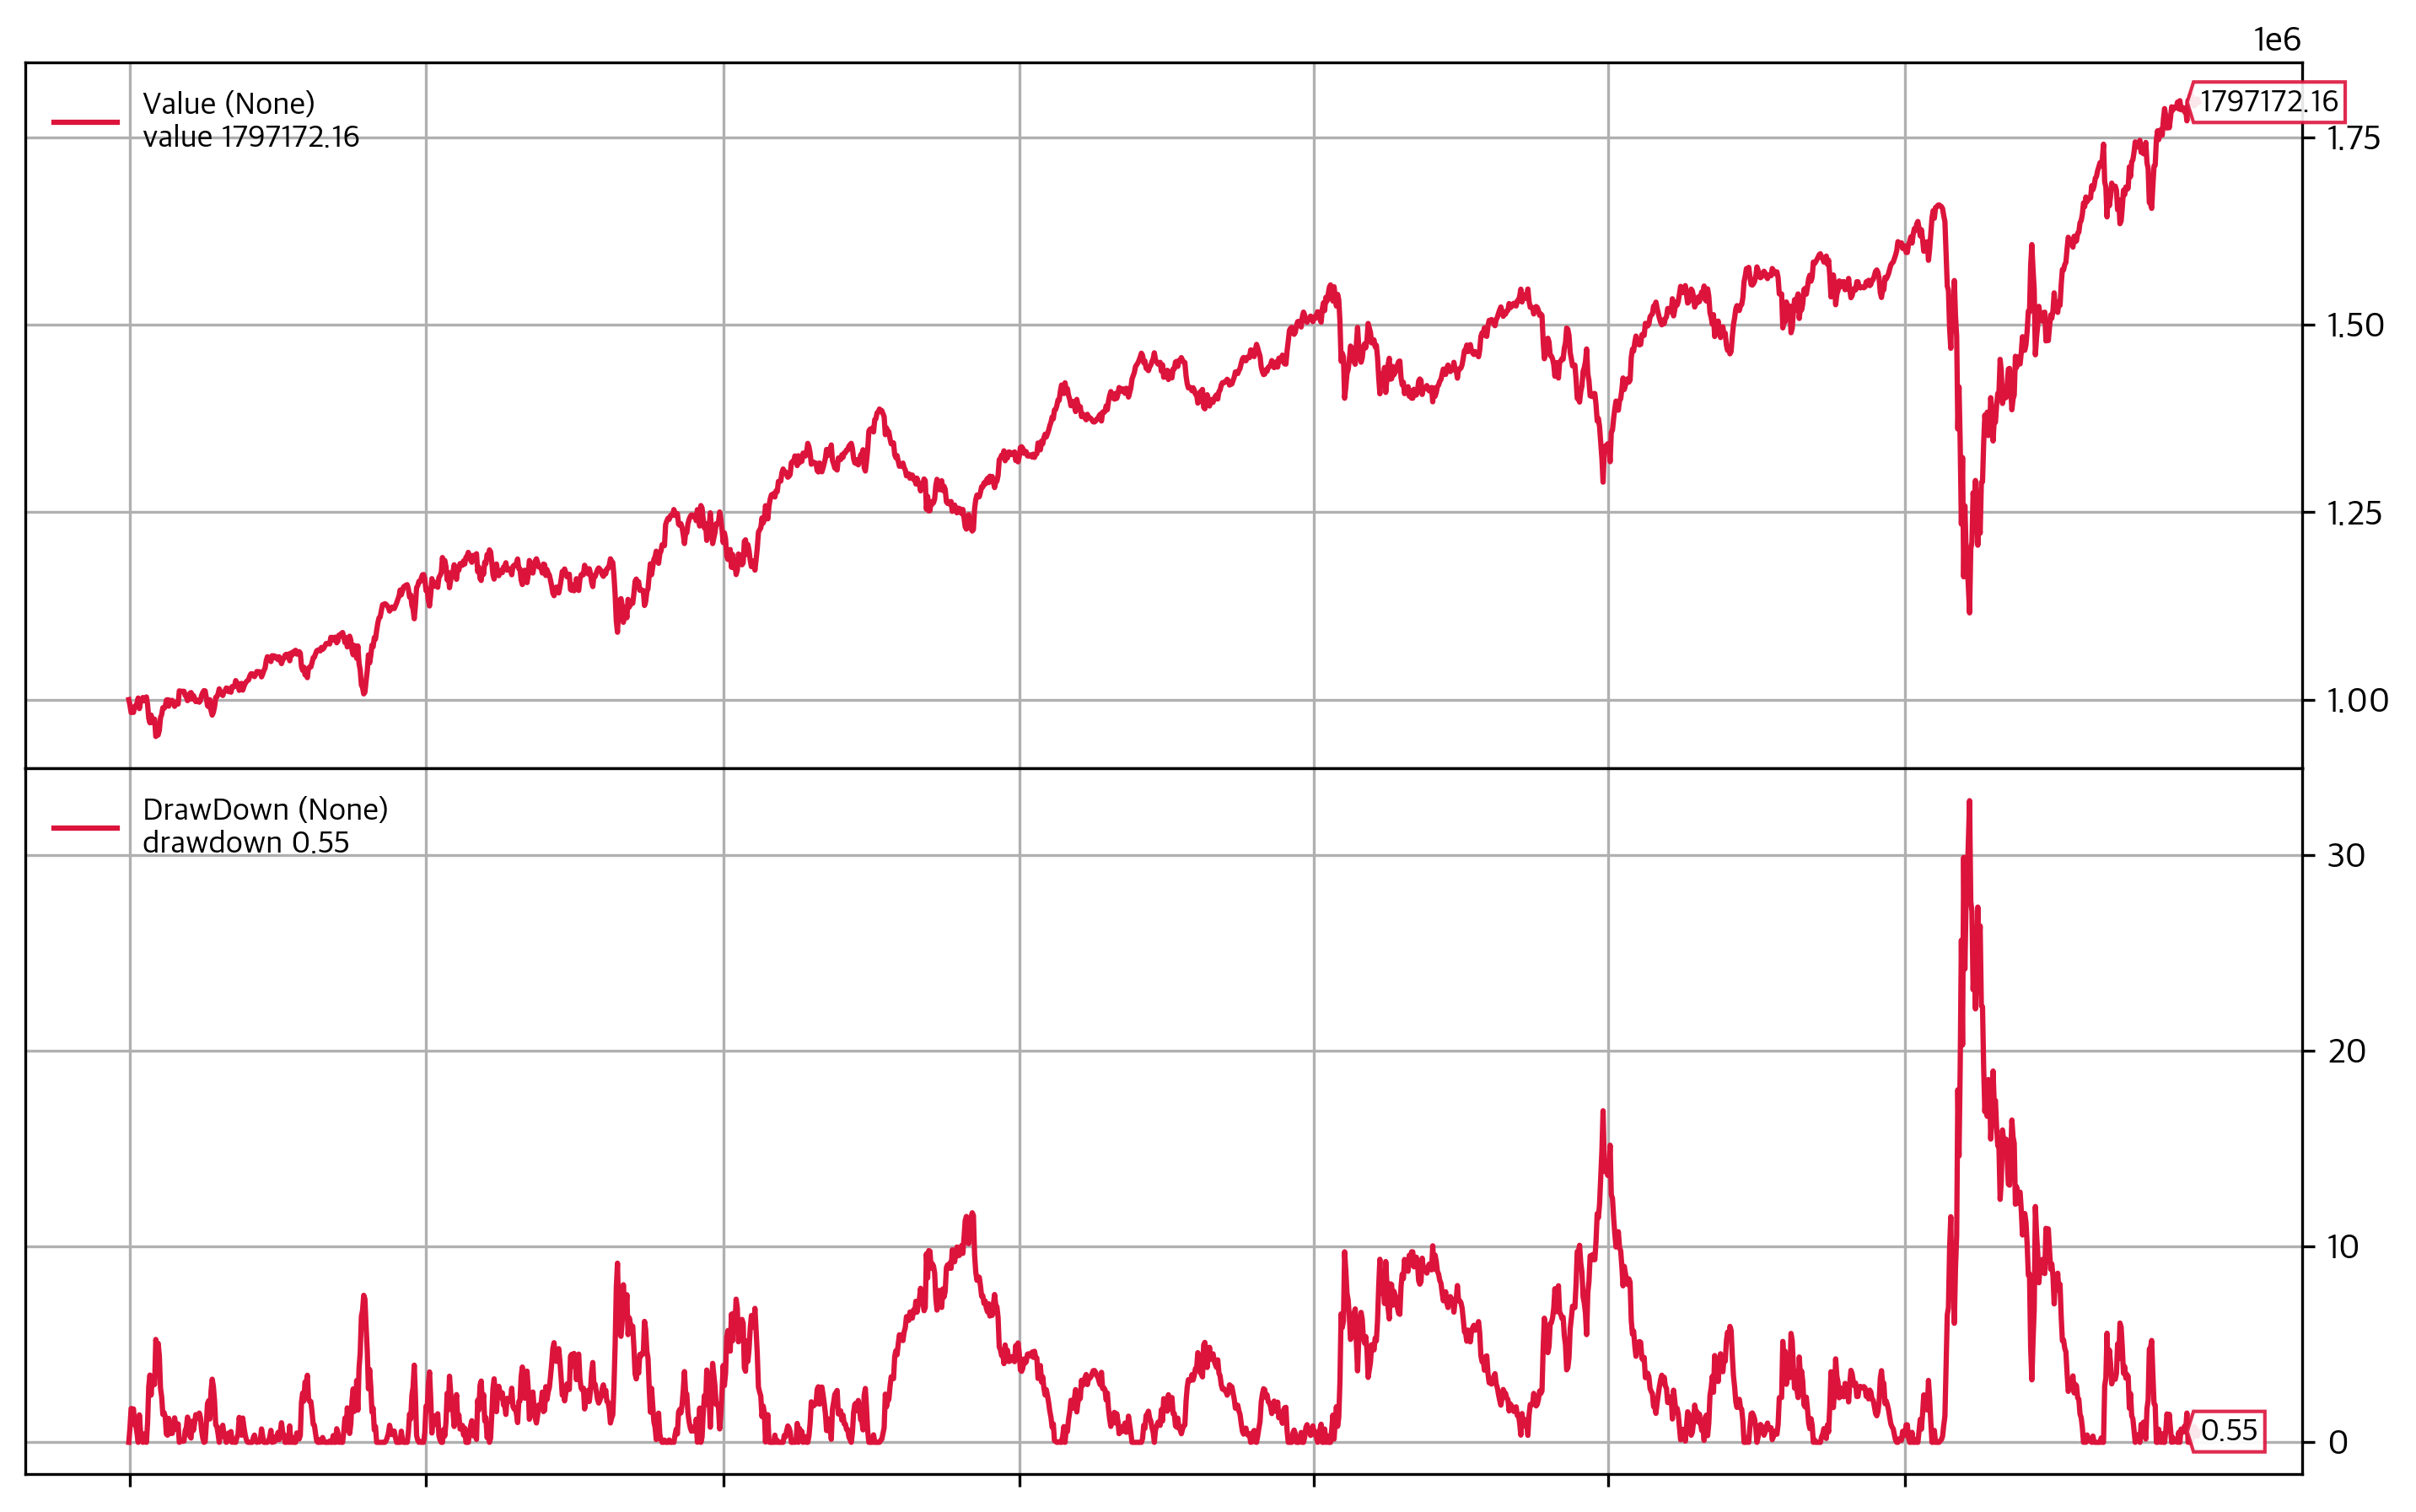

In [30]:
############################################################
# Backtesting Mean Variance Strategy
############################################################

assets = returns.columns.tolist()
weights = models['MV']

dd, cagr, sharpe = backtest(assets_prices,
                            AssetAllocation,
                            start=start,
                            end=end,
                            plot=True)

In [31]:
############################################################
# Show Mean Variance Strategy Stats 
############################################################

print(f"Max Drawdown: {dd:.2f}%")
print(f"CAGR: {cagr:.2f}%")
print(f"Sharpe: {sharpe:.3f}")

Max Drawdown: 32.80%
CAGR: 5.46%
Sharpe: 0.676


array([<Axes: ylabel='2766'>], dtype=object)

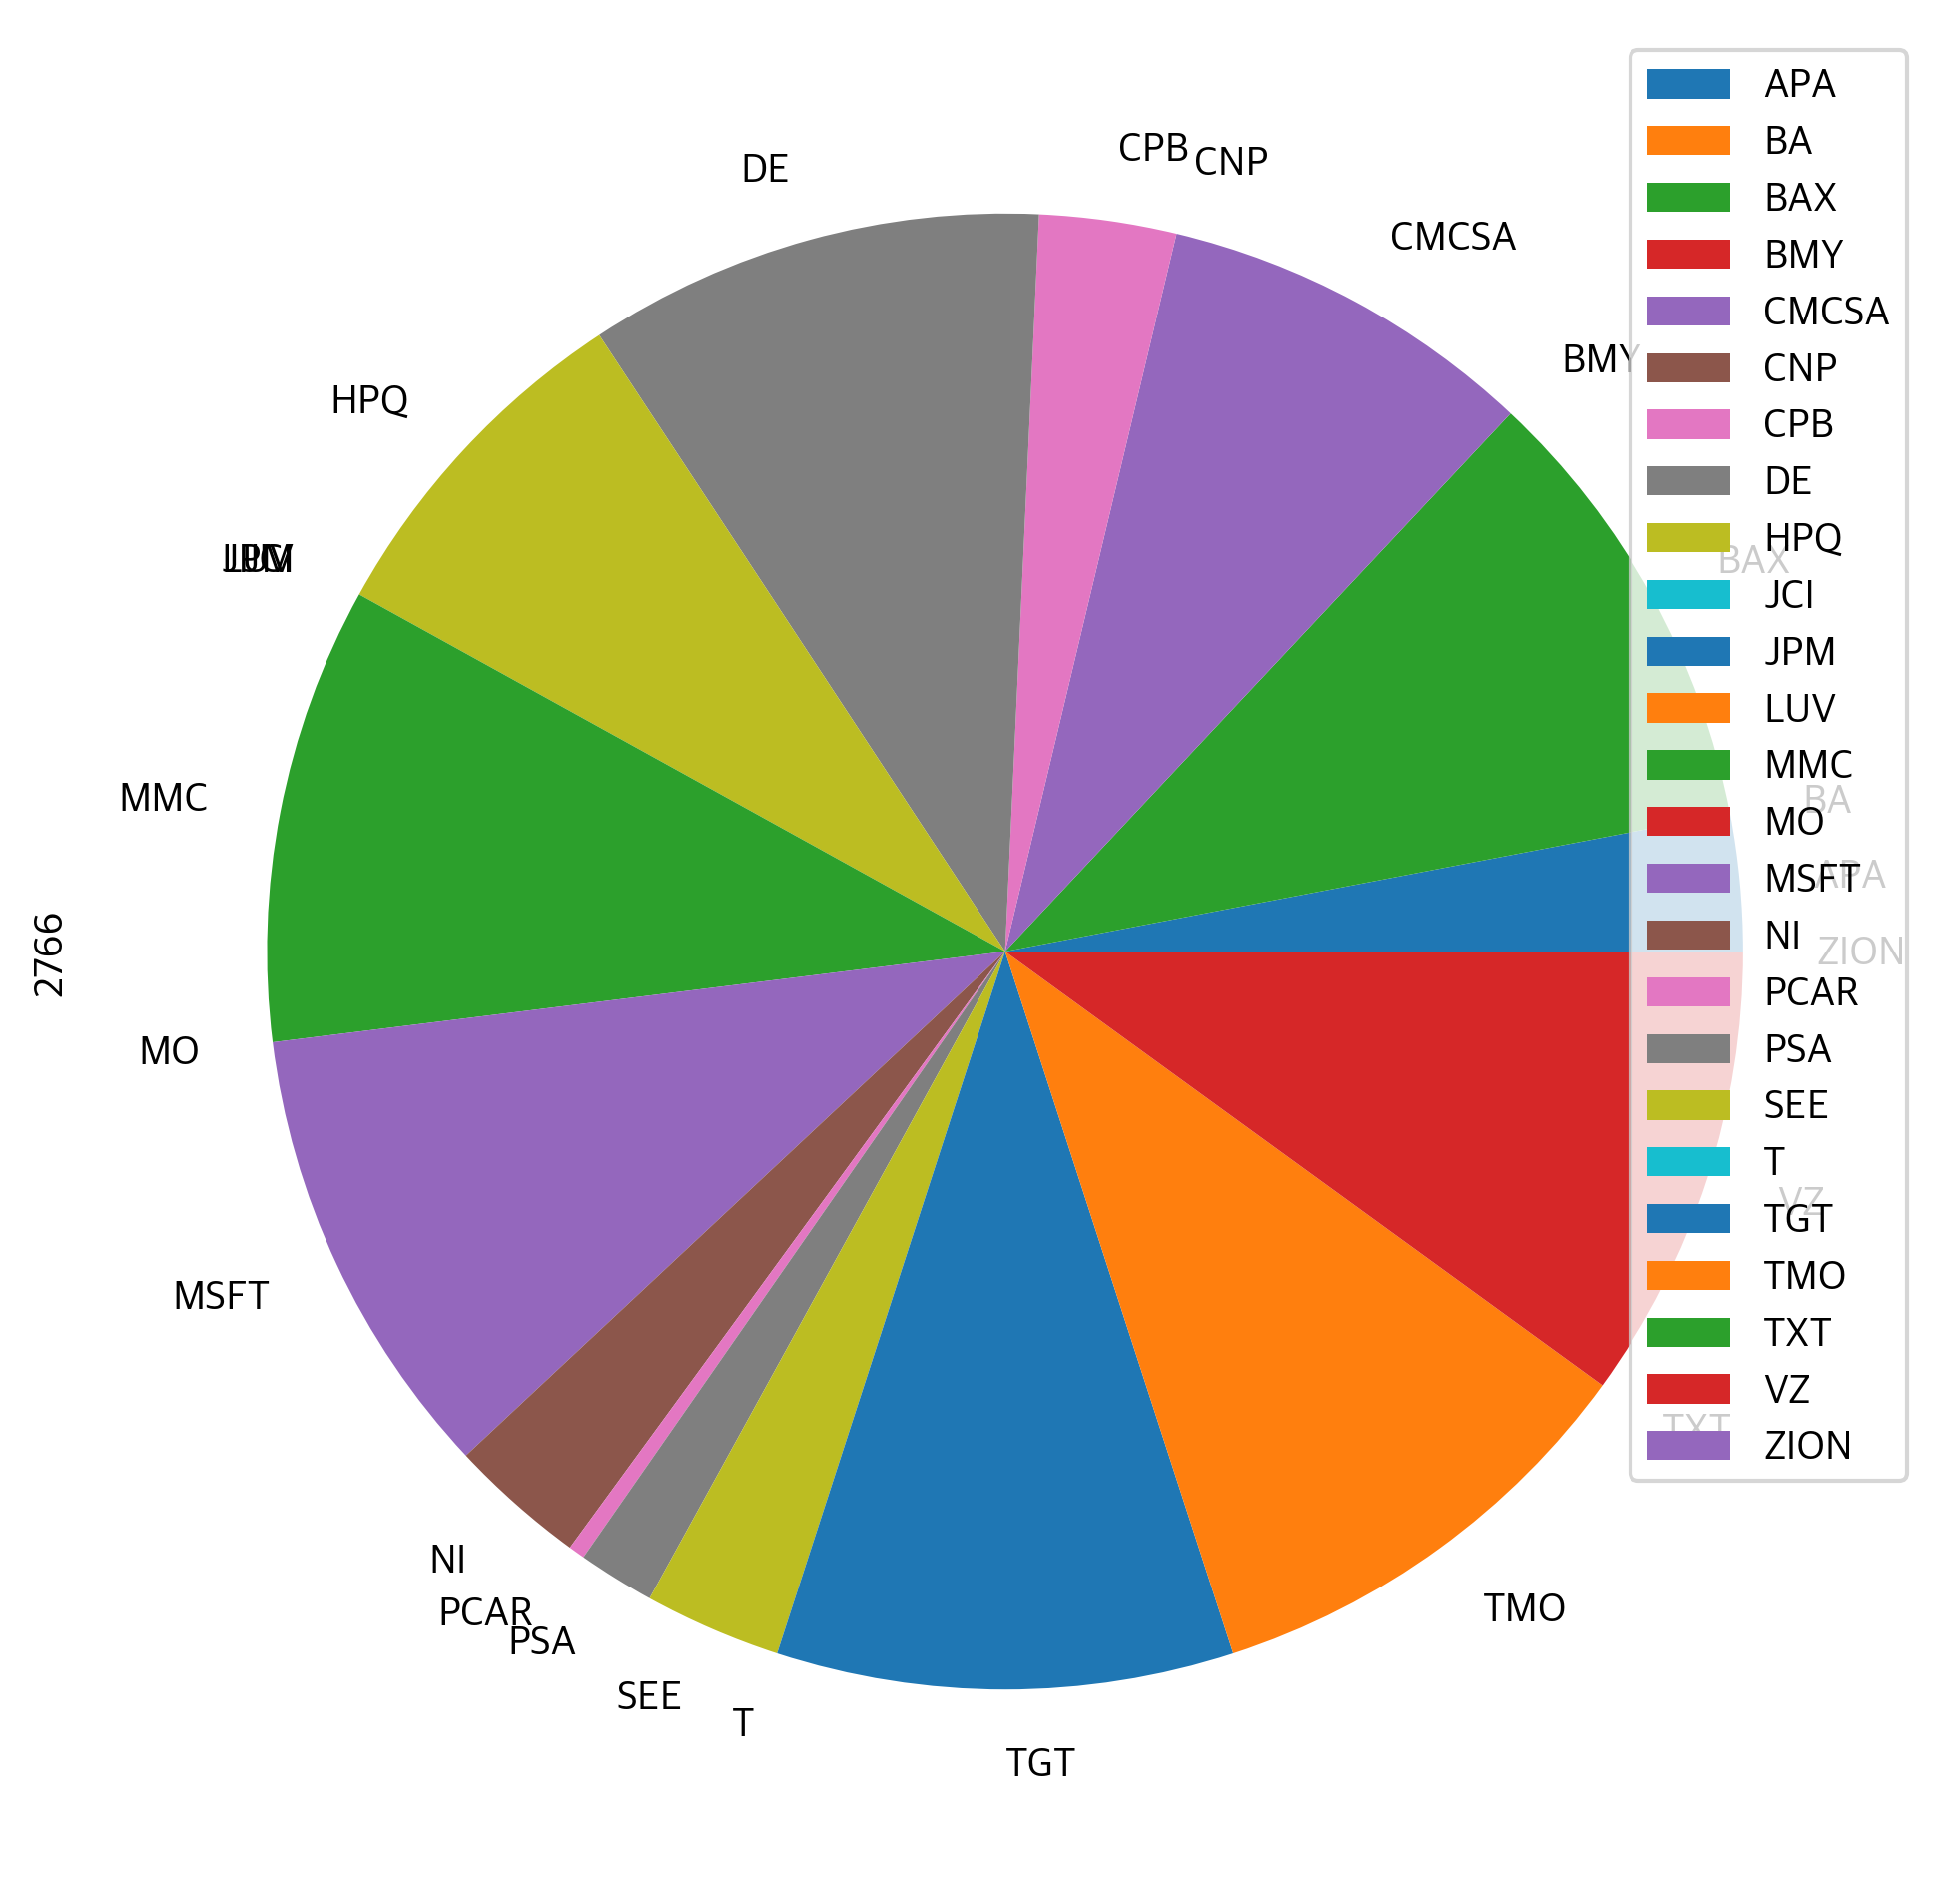

In [32]:
############################################################
# Plotting the composition of the last MV portfolio
############################################################

w = pd.DataFrame(models['MV'].iloc[-1,:])

# We need matplotlib >= 3.3.0 to use this function
#ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
#                 height=6, width=10, ax=None)

w.plot.pie(subplots=True, figsize=(8, 8))